<a href="https://colab.research.google.com/github/Vahramb/aaa/blob/aaaa/Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""from google.colab import drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Loan_Scoring_Third_Phase/HSBC/Codes'
folder = '/content/gdrive/MyDrive/Loan_Scoring_Third_Phase/HSBC/'"""

folder = 'G:\My Drive\Loan_Scoring_Third_Phase\HSBC/'
%cd = 'G:\My Drive\Loan_Scoring_Third_Phase\HSBC\Codes'

import os
import sys
module_path = os.path.abspath(os.path.join('G:\My Drive\Loan_Scoring_Third_Phase\HSBC\Codes'))
if module_path not in sys.path:
  sys.path.append(module_path)

!pip install catboost
!pip install xgboost==1.4.2
!pip install tune-sklearn scikit-optimize ray[tune]
!pip install xlwings
!pip install pyreadstat
!pip install fuzzywuzzy
import pickle
import pandas as pd
import numpy as np
from helpers import *
from sklearn.preprocessing import LabelEncoder
from report import *

import matplotlib.pyplot as plt
from sklearn.base import clone
from train import *

[WinError 123] The filename, directory name, or volume label syntax is incorrect: "= 'G:\\My Drive\\Loan_Scoring_Third_Phase\\HSBC\\Codes'"
C:\Users\Aram Harutyunyan


In [ ]:
with open(folder + 'models/ray2/wvs/train.pkl','rb') as file:
  train = pickle.load(file)
train.validation_results_

{'cat': 0.616953300100712,
 'xgb': 0.6213638820102474,
 'rf': 0.6155894594137616,
 'voting': 0.6247308459501215,
 'stacking': 0.616953300100712}

In [ ]:
raw_data = pd.read_csv(folder + 'Data/main/HSBC_raw.csv')
raw_data


,UID,Applic\ndate,Loan/Card/Overdraft Type,Amount/AMD,Approved/declined,Reason of decline,Approval date,Approved\nlimit,Current limit (only for reviews),Loyal/Payroll,...,Occupation type,Employed since (current employer),Salary (in AMD),Salary periodicity,Other income (in AMD),Other income periodicity,Previous Employer,Duration with previous employer (years),Residential Address,Work Address
0,1,2018-04-18,Credit card Application,350000.0,Approved,NaN,2018-04-18 00:00:00,350000.0,NaN,payroll,...,Specialist/Professional roles,2015-11-23,200130.0,M,0.0,NaN,AMBERD RESEARCH CENTER,0.6,NOR NORQ DISTRICT BLD APT YEREVAN RA,KHORENATSI STR YEREVAN RA FUND FOR ARMENIAN RE...
1,2,2019-04-03,PAL Unsecured,620000.0,Approved,NaN,2019-04-03 00:00:00,620000.0,NaN,payroll,...,Specialist/Professional roles,2007-01-01,348000.0,M,0.0,NaN,UNWFP,7.0,MOLDOVAKAN STR APT YEREVAN RA,PETROS ADAMYAN STR UNDP YEREVAN RA
2,3,2018-02-08,Credit card Limit review,100000.0,Approved,NaN,2018-03-21 00:00:00,100000.0,0.0,payroll,...,Specialist/Professional roles,2010-02-01,1076420.0,M,0.0,NaN,NaN,0.0,SARYAN STR BLD / APT YEREVAN RA,KHORENATSI STR YEREVAN RA MONITIS CJSC
3,4,2019-12-09,PAL Unsecured,2600000.0,Approved,NaN,2019-12-12 00:00:00,2600000.0,NaN,payroll,...,Specialist/Professional roles,2019-09-01,600000.0,M,250000.0,M,NaN,0.0,A ARAM KHACHATRYAN STR YEREVAN RA,TBILISYAN HIGHWAY / YEREVAN RA
4,5,2018-01-28,PAL Unsecured,2000000.0,Approved,NaN,2018-02-09 00:00:00,2000000.0,NaN,payroll,...,Management roles,1996-05-15,904800.0,M,0.0,NaN,NaN,0.0,SARALANJI STR HOUSE / DILIJAN RA,GORKI STR DILIJAN RA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,7248,2020-09-14,Credit card Application,50000.0,Approved,NaN,2020-09-30 00:00:00,50000.0,NaN,payroll,...,Specialist/Professional roles,2016-01-01,800000.0,M,566000.0,M,NaN,0.0,KHAGHAGH DON STR BLD APT YEREVAN RA,BAGHRAMYAN STR LANE BLD / YEREVAN RA
11548,7249,2020-10-07,Credit card Application,500000.0,Approved,NaN,2020-10-14 00:00:00,500000.0,NaN,payroll,...,Management roles,2014-11-01,1034500.0,M,0.0,NaN,NaN,0.0,GYURJYAN STR / APT YEREVAN RA,NORK G HOVSEPYAN STR BLD YEREVAN RA
11549,7250,2020-09-14,Credit card Application,200000.0,Approved,NaN,2020-09-23 00:00:00,200000.0,NaN,payroll,...,Management roles,2006-01-01,100000.0,M,2800000.0,Y,NaN,0.0,AVAG PETROSYAN STR BLD APT YEREVAN RA,PAVSTOS BUZAND STT BLD YEREVAN RA
11550,7251,2020-09-17,PAL REFINANCING,4000000.0,Approved,NaN,2020-09-22 00:00:00,4000000.0,NaN,payroll,...,Specialist/Professional roles,2016-01-01,1600000.0,M,45000.0,M,NaN,0.0,SHINARARNERI STR BLD APT YEREVAN RA,DANIELVARUZHAN A YEREVAN RA


In [ ]:
with open(folder + 'best models/best_model.pkl','rb') as file:
  model = pickle.load(file)

In [ ]:
columns = pd.read_csv(folder + 'Data/hsbc/x_train.csv').columns.values
cat = model.named_estimators_['cat']
rf = model.named_estimators_['rf']
xgb = model.named_estimators_['xgb']

In [ ]:
cat_imp = pd.Series(cat.get_feature_importance(), index = columns, name = 'cat')
rf_imp = pd.Series(rf.feature_importances_, index = columns, name = 'rf') * 100
xgb_imp = pd.Series(xgb.feature_importances_, index = columns, name = 'xgb') * 100

total_imp = pd.merge(xgb_imp,pd.merge(cat_imp,rf_imp, right_index = True, left_index = True),right_index = True, left_index = True)
total_imp['mean'] = total_imp.mean(axis = 1)
total_imp = total_imp.sort_values(['mean'], ascending = False).head(20)
total_imp

,xgb,cat,rf,mean
Applic\ndate,3.217654,9.434857,6.684809,6.445773
Local Currency Average balance for last 1month (customer level),5.102237,7.598917,6.173982,6.291712
Debt/Income,3.253951,4.941734,5.127009,4.440898
Local Currency Average balance for last 6 months (customer level),3.328054,4.339648,5.418936,4.362213
Relationship start date (with the Bank),3.861423,2.477817,4.522386,3.620542
Salary weighted,3.792286,2.183816,4.318145,3.431416
Work Address,2.762727,3.488320,3.992379,3.414475
Employer,1.979683,4.508199,3.223871,3.237251
UID,1.930388,3.778456,3.797056,3.168633
Job Title,2.514993,3.432462,3.420620,3.122692


In [ ]:
vis = total_imp.head(20)
vis.index = ['Applic/ndate','Average balance 1 month','Relationship start date','Debt/Income','Gender','Average balance 6 months'
              ,'Employed since','Industry','Job title','Loan/Card/Overdraft Type','Turnover 6 months','Experience','Work address'
              ,'Salary weighted','UID','Employer','Total income','Amount/AMD','Residential address','Residential lat']
vis

,xgb,cat,rf,mean
Applic/ndate,3.217654,9.434857,6.684809,6.445773
Average balance 1 month,5.102237,7.598917,6.173982,6.291712
Relationship start date,3.253951,4.941734,5.127009,4.440898
Debt/Income,3.328054,4.339648,5.418936,4.362213
Gender,3.861423,2.477817,4.522386,3.620542
Average balance 6 months,3.792286,2.183816,4.318145,3.431416
Employed since,2.762727,3.488320,3.992379,3.414475
Industry,1.979683,4.508199,3.223871,3.237251
Job title,1.930388,3.778456,3.797056,3.168633
Loan/Card/Overdraft Type,2.514993,3.432462,3.420620,3.122692


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1080x504 with 0 Axes>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


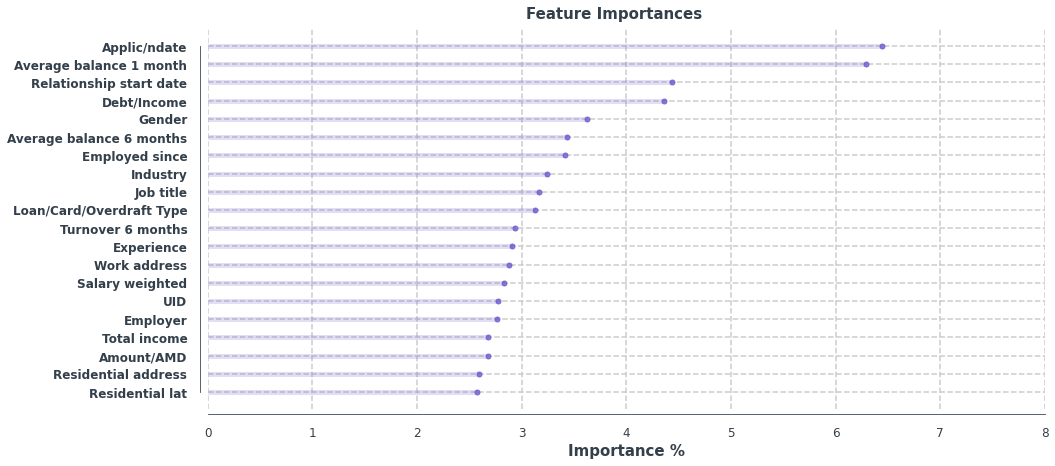

In [ ]:
import matplotlib.pyplot as plt
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# set font
plt.figure(figsize = (15,7))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# create some fake data
values = pd.Series(vis['mean'], 
                        index=vis.index)
df = pd.DataFrame({'value' : values})
df = df.sort_values(by='value')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(15,7))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['value'], color='slateblue', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['value'], my_range, "o", markersize=5, color='slateblue', alpha=0.8)

# set labels
ax.set_xlabel('Importance %', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(0.42, 0.9, 'Feature Importances', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
ax.set_xlim(0,8)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))
plt.yticks(fontsize = 12, fontweight = 'bold')